In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

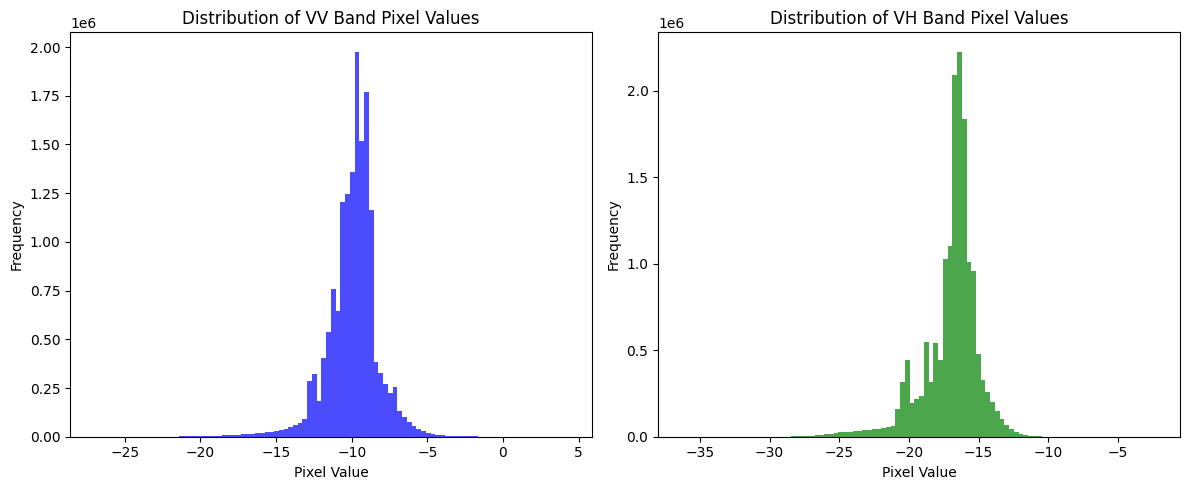

In [12]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def plot_vvvh_distributions(folder_path):
    vv_values = []
    vh_values = []
    
    # Find all files ending with '_VHVV.tif' in the specified folder
    file_paths = glob.glob(os.path.join(folder_path, "*_VHVV.tif"))

    # Iterate through each image file
    for file_path in file_paths:
        with rasterio.open(file_path) as src:
            # Read the VV and VH bands separately
            vv_band = src.read(1)  # VV is the first band
            vh_band = src.read(2)  # VH is the second band
            
            # Flatten the arrays and add to the lists, ignoring any NaN values
            vv_values.extend(vv_band[~np.isnan(vv_band)].flatten())
            vh_values.extend(vh_band[~np.isnan(vh_band)].flatten())
    
    # Plot distribution for VV band
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(vv_values, bins=100, color='blue', alpha=0.7)
    plt.title("Distribution of VV Band Pixel Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    
    # Plot distribution for VH band
    plt.subplot(1, 2, 2)
    plt.hist(vh_values, bins=100, color='green', alpha=0.7)
    plt.title("Distribution of VH Band Pixel Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# Usage
plot_vvvh_distributions("/mnt/data1tb/SAR2NDVI/new_dataset/SAR2NDVI_SAMPLES_MASK")


(342, 470)


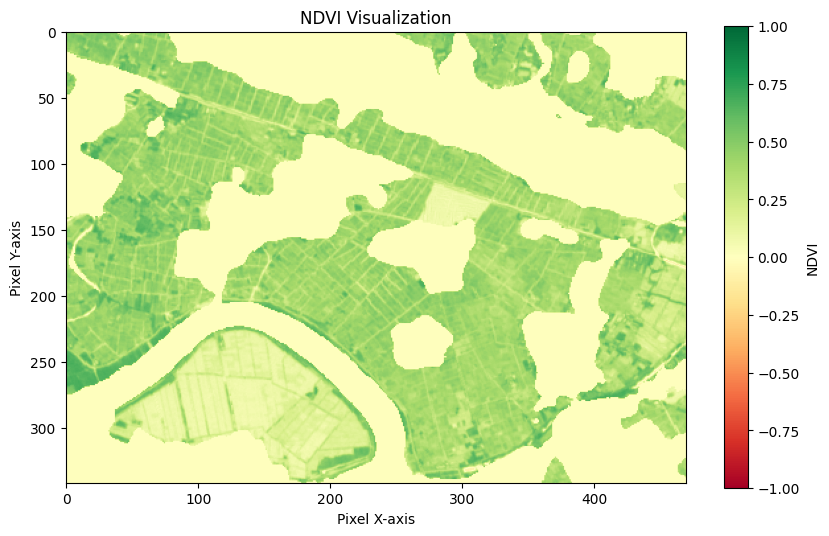

In [17]:
# Open the .tif file
with rasterio.open("/mnt/data1tb/SAR2NDVI/new_dataset/SAR2NDVI_SAMPLES_MASK/2019-12-10_NDVI.tif") as src:
    # Read Red and NIR bands (assuming Red is band 1 and NIR is band 2; adjust if different)
    ndvi = src.read(1).astype('float32')

# Handle division by zero errors
ndvi = np.nan_to_num(ndvi, nan=0.0, posinf=0.0, neginf=0.0)
print(ndvi.shape)

# Visualize the NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, vmin=-1, vmax=1, cmap='RdYlGn')  # Use a colormap that represents vegetation well
plt.colorbar(label="NDVI")
plt.title("NDVI Visualization")
plt.xlabel("Pixel X-axis")
plt.ylabel("Pixel Y-axis")
plt.show()

(65, 65)


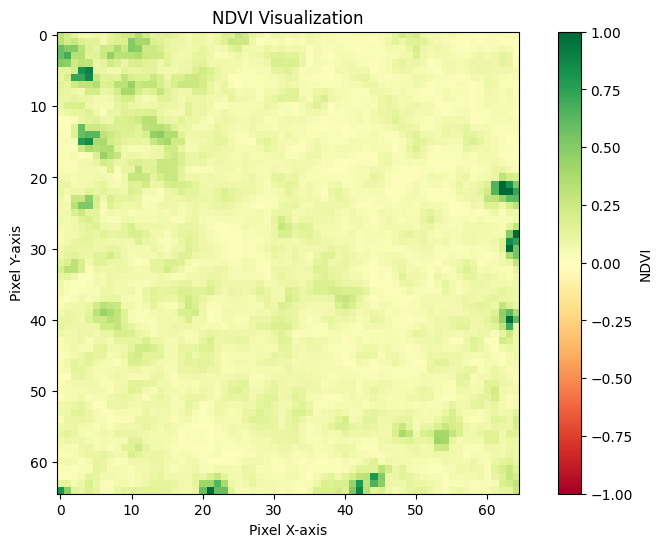

In [9]:
# Open the .tif file
with rasterio.open("/mnt/data1tb/SAR2NDVI/Old_data/dataset/train/002/20170506_0/resolution_10x10/Sentinel-1_dsc/20170506_VV.tif") as src:
    # Read Red and NIR bands (assuming Red is band 1 and NIR is band 2; adjust if different)
    ndvi = src.read(1).astype('float32')

# Handle division by zero errors
ndvi = np.nan_to_num(ndvi, nan=0.0, posinf=0.0, neginf=0.0)
print(ndvi.shape)

# Visualize the NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, vmin=-1, vmax=1, cmap='RdYlGn')  # Use a colormap that represents vegetation well
plt.colorbar(label="NDVI")
plt.title("NDVI Visualization")
plt.xlabel("Pixel X-axis")
plt.ylabel("Pixel Y-axis")
plt.show()

initialize network with normal
cloud detected: dataset/test/001/20170729/20170729_VV.tif, dataset/../sentinel2/adjusted_001/20170804_ndvi.tif
cloud detected: dataset/test/001/20170822/20170822_VV.tif, dataset/../sentinel2/adjusted_001/20170824_ndvi.tif
cloud detected: dataset/test/001/20171021/20171021_VV.tif, dataset/../sentinel2/adjusted_001/20171023_ndvi.tif
cloud detected: dataset/test/001/20171102/20171102_VV.tif, dataset/../sentinel2/adjusted_001/20171102_ndvi.tif
cloud detected: dataset/test/001/20171114/20171114_VV.tif, dataset/../sentinel2/adjusted_001/20171112_ndvi.tif
cannot find near date: dataset/test/001/20171126/20171126_VV.tif
20170506
min: -0.775, max: 0.501


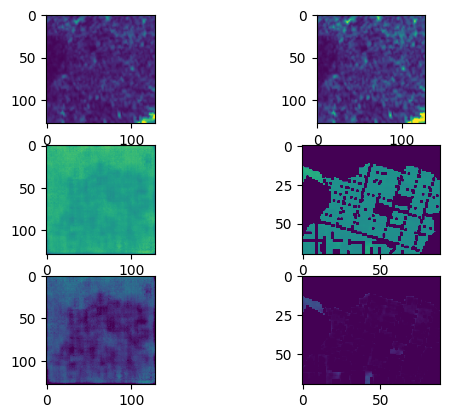

20170518
min: -0.674, max: 0.532


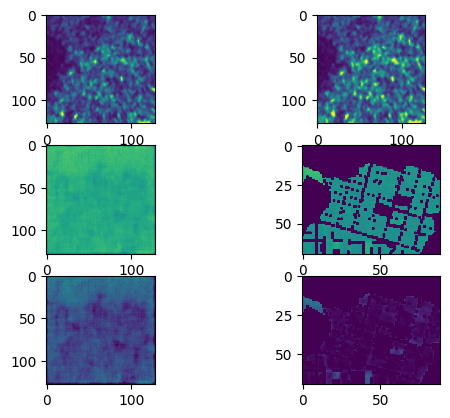

20170530
min: -0.703, max: 0.495


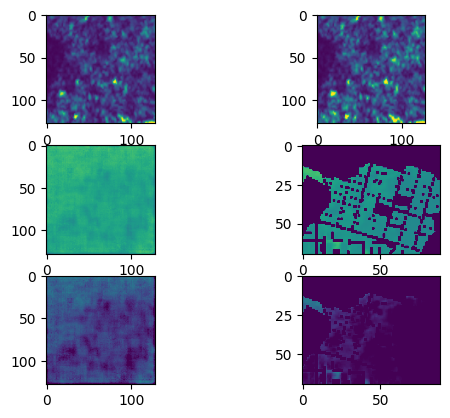

20170611
min: -0.771, max: 0.508


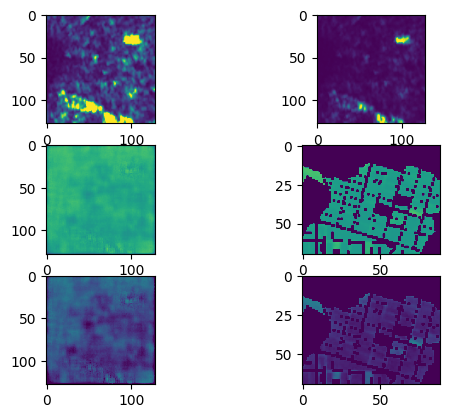

20170623
min: -0.748, max: 0.984


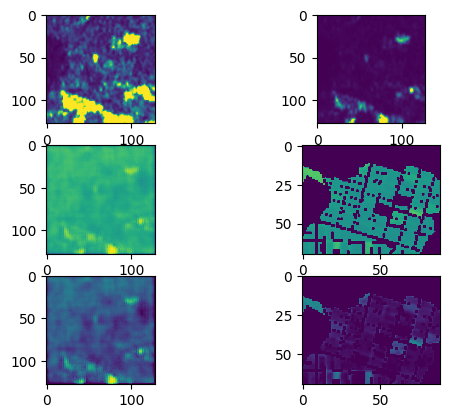

20170705
min: -0.754, max: 0.817


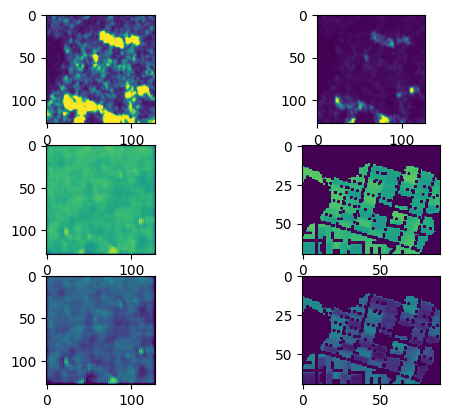

20170717
min: -0.737, max: 0.475


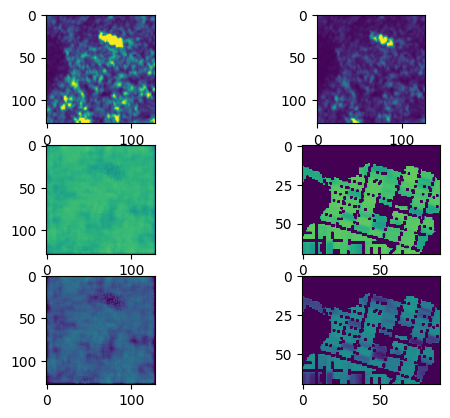

20170729
cloud detected: dataset/test/001/20170729/20170729_VV.tif, dataset/../sentinel2/adjusted_001/20170804_ndvi.tif
min: -0.664, max: 0.566


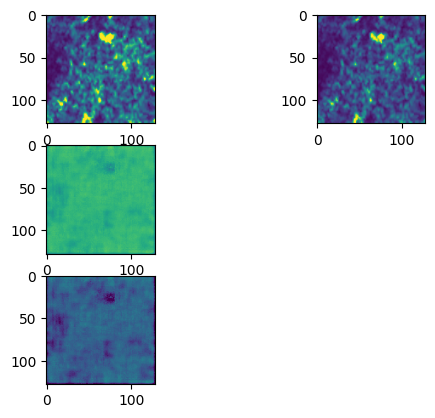

20170810
min: -0.686, max: 0.547


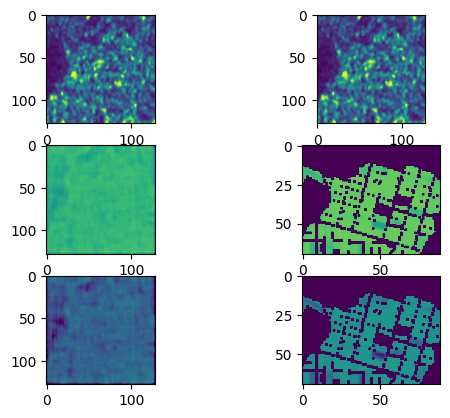

20170822
cloud detected: dataset/test/001/20170822/20170822_VV.tif, dataset/../sentinel2/adjusted_001/20170824_ndvi.tif
min: -0.705, max: 0.542


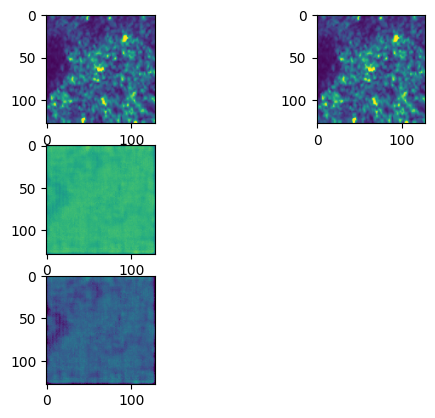

20170915
min: -0.732, max: 0.528


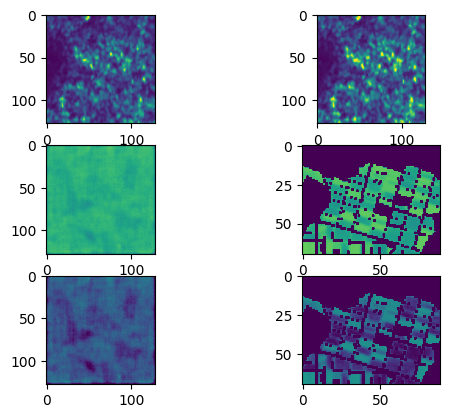

20170927
min: -0.699, max: 0.510


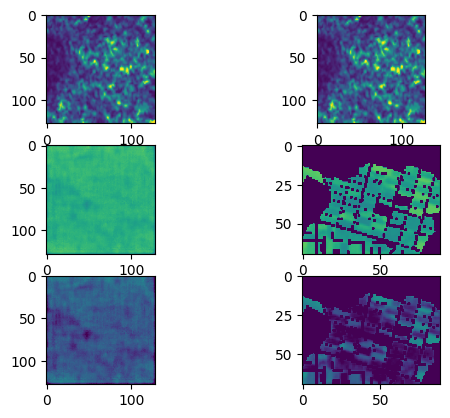

20171009
min: -0.706, max: 0.526


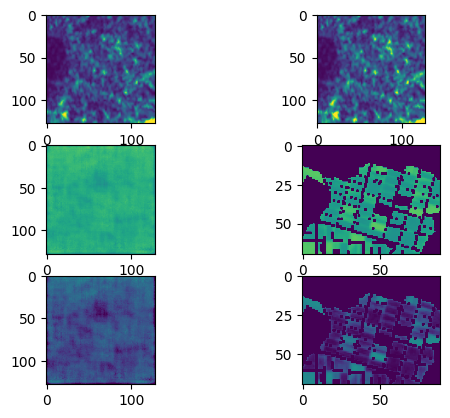

20171021
cloud detected: dataset/test/001/20171021/20171021_VV.tif, dataset/../sentinel2/adjusted_001/20171023_ndvi.tif
min: -0.677, max: 0.541


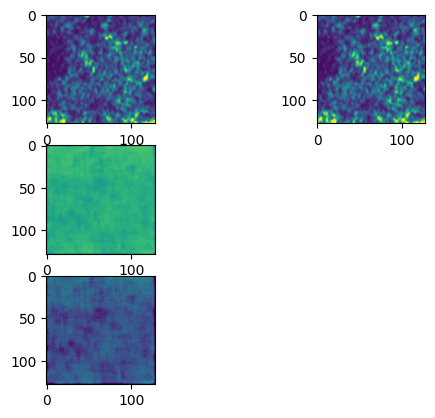

20171102
cloud detected: dataset/test/001/20171102/20171102_VV.tif, dataset/../sentinel2/adjusted_001/20171102_ndvi.tif
min: -0.678, max: 0.515


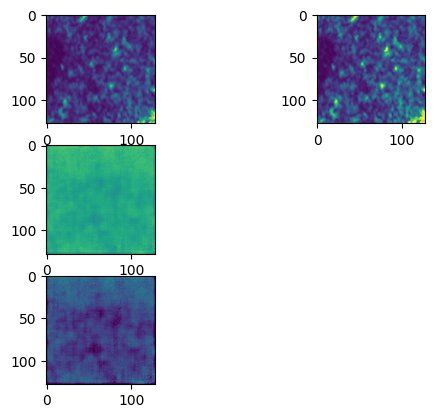

20171114
cloud detected: dataset/test/001/20171114/20171114_VV.tif, dataset/../sentinel2/adjusted_001/20171112_ndvi.tif
min: -0.750, max: 0.498


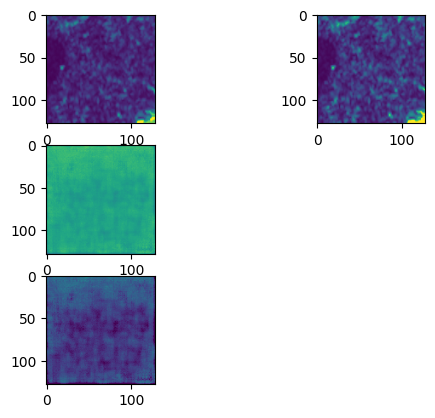

20171126
cannot find near date: dataset/test/001/20171126/20171126_VV.tif
min: -0.707, max: 0.488


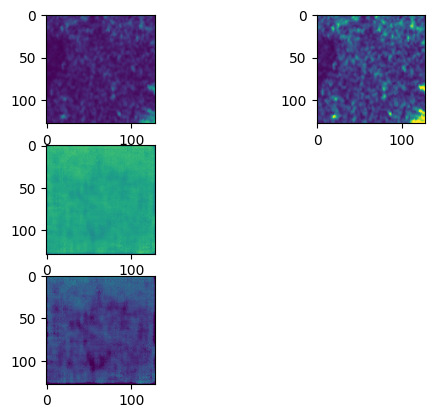

In [2]:
import argparse
import os
import re
import sys
from collections import OrderedDict

import cv2
import numpy as np
import torch
import ttach as tta
import matplotlib.pyplot as plt

from preprocessing import SpaceShiftNdviDataset, do_nothing, transform_vvvh

if True:
    sys.path.append("pytorch-CycleGAN-and-pix2pix")
    from models import networks


def apply_tta(model, x, transforms, device):
    x_torch = torch.from_numpy(x).unsqueeze(0).to(device)

    ys = None
    for transformer in transforms:
        augmented_image = transformer.augment_image(x_torch)
        with torch.no_grad():
            y = model(augmented_image)
        deaug_y = transformer.deaugment_mask(y)
        if torch.cuda.is_available():
            y_numpy = deaug_y.squeeze(0).cpu().detach().numpy().copy()
        else:
            y_numpy = deaug_y.squeeze(0).detach().numpy().copy()
        ys = y_numpy if ys is None else \
            np.concatenate([ys, y_numpy], axis=0)

    return np.mean(ys, axis=0)


def fix_key(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if k.startswith('module.'):
            k = k[7:]
        new_state_dict[k] = v
    return new_state_dict


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--model_path",
        type=str,
        default="/mnt/data1tb/SAR2NDVI/output/training-sd0-itvv01_vv995_vh01_vh_prvi_rfdi_rvi4s1_rvi_pvhvv_mvhvv-ataspect_rot20_flip-is128-oc1-gnunet_128-dnbasic-ne1000-ed1000-bs1-la50000-es1000-imbicubic/gen_best-ep00002-vl03182.pt")
    parser.add_argument("--output_folder", type=str,
                        default="output/test_tif/")
    args, remaining = parser.parse_known_args()

    model_path = args.model_path
    output_folder = args.output_folder

    os.makedirs(output_folder, exist_ok=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_types = re.search("-it([0-9a-z_]+)", model_path)[1]
    output_channel = int(re.search("-oc([0-9]+)", model_path)[1])
    gen_name = re.search("-gn([a-z0-9_]+)", model_path)[1]
    image_size = int(re.search("-is([0-9]+)", model_path)[1])
    seed = int(re.search("-sd(\\d+)", model_path)[1])

    gen = networks.define_G(input_nc=len(input_types.split("_")),
                            output_nc=output_channel,
                            ngf=64, netG=gen_name,
                            use_dropout=True,
                            norm="batch",
                            gpu_ids=([0] if torch.cuda.is_available() else []))

    if torch.cuda.is_available():
        gen.load_state_dict(torch.load(model_path, map_location=device))
    else:
        gen.load_state_dict(fix_key(
            torch.load(model_path, map_location=device)))

    transforms = tta.Compose([
        tta.HorizontalFlip(),
        tta.VerticalFlip(),
        tta.Multiply(factors=[0.9, 1, 1.1]),
    ])

    test_dataset = SpaceShiftNdviDataset(
        split="test",
        vvvh_original=True,
        vvvh_crop=False,
        transform_x=lambda x, **kwargs:
            transform_vvvh(x, img_size=image_size,
                           input_types=input_types, **kwargs),
        transform_y=do_nothing,
        seed=seed,
    )

    # test_crop_dataset = SpaceShiftNdviDataset(
    #     split="test",
    #     vvvh_original=False,
    #     vvvh_crop=True,
    #     ndvi_original=False,
    #     ndvi_crop=True,
    #     transform_x=do_nothing,
    #     transform_y=do_nothing,
    #     seed=seed,
    # )

    s2_001_dataset = SpaceShiftNdviDataset(
        split="sentinel2_adjusted_001",
        vvvh_original=True,
        vvvh_crop=False,
        ndvi_original=True,
        ndvi_crop=False,
        seed=seed,
    )

    for ((vvvh_resized, _), vvvh_filepaths) \
            in zip(test_dataset, test_dataset.selected_paths_list_dict["x"][0]):

        date = vvvh_filepaths[0].split("/")[-1].replace("_VV.tif", "")
        print(date)

        _, s2_path = \
            s2_001_dataset.find_nearest_ndvi_path(vvvh_filepaths[0], "001")
        s2 = None if s2_path is None else s2_001_dataset.load_tif_image(
            s2_path)

        fake_ndvi = apply_tta(gen, vvvh_resized, transforms, device)
        p = fake_ndvi * 2 - 1
        vvvh = vvvh_resized

        _, height, width = vvvh.shape
        p = cv2.resize(p, dsize=(width, height))

        p[(vvvh[0] + vvvh[1]) == 0.0] = np.nan
        print("min: %.3f, max: %.3f" % (np.nanmin(p), np.nanmax(p)))
        p[(vvvh[0] + vvvh[1]) == 0.0] = -100

        plt.subplot(321).imshow(vvvh[0], vmin=0, vmax=1)
        plt.subplot(322).imshow(vvvh[1], vmin=0, vmax=1)
        plt.subplot(323).imshow(p, vmin=-1, vmax=1)
        if s2 is not None:
             plt.subplot(324).imshow(s2, vmin=-1, vmax=1)
        plt.subplot(325).imshow(p, vmin=0, vmax=1)
        if s2 is not None:
             plt.subplot(326).imshow(s2, vmin=0, vmax=1)
        plt.show()

        cv2.imwrite("%s/daiki_%s_ndvi.tif" % (output_folder, date), p)


In [ ]:
import rasterio 

